<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_AMLlab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lasso and Ridge Regression

Given the laboratory data. All attributes except Category and Sex are numerical.


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import SimpleImputer
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

Data Preprocessing

In [ ]:
data = pd.read_csv('/content/program_5_dataset - program_5_dataset.csv')
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
data.shape

(615, 14)

In [ ]:
data.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,613.000000,595.000000,612.000000,613.000000,615.000000,615.000000,604.000000,614.000000,615.000000,614.000000
mean,308.000000,47.408130,41.622838,68.263529,28.493627,34.731648,11.396748,8.196634,5.368013,81.271987,39.533171,72.044137
std,177.679487,10.055105,5.784979,26.049129,25.498962,33.090023,19.673150,2.205657,1.133665,49.795186,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.607500,67.000000,15.700000,69.300000
50%,308.000000,47.000000,42.000000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,76.850000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.100000,32.900000,11.200000,9.590000,6.065000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         613 non-null    float64
 5   ALP         595 non-null    float64
 6   ALT         612 non-null    float64
 7   AST         613 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        604 non-null    float64
 11  CREA        614 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


**Inference:** There is some null values in some attributes

In [ ]:
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')
data['CREA'] = imputer.fit_transform(data[['CREA']])
data['PROT'] = imputer.fit_transform(data[['PROT']])
data['CHOL'] = imputer.fit_transform(data[['CHOL']])
data['ALT'] = imputer.fit_transform(data[['ALT']])
data['ALP'] = imputer.fit_transform(data[['ALP']])
data['ALB'] = imputer.fit_transform(data[['ALB']])
data['AST'] = imputer.fit_transform(data[['AST']])

**Inference:** The null values in CREA and PROT are filled with mean by using SimpleImputer from sklearn

Build a simple linear Regression considering ‘CREA’ as predictor variable and ‘PROT’ as Target variable (for all models)


In [ ]:
predictors = data[['CREA']]
target = data[['PROT']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors,target, test_size = 0.20,random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

Model Evaluation for Simple Linear Regression

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 31.66
R-squared (R2): -0.01


**Inference:** Mse displays the average squared differences between the actual and predicted value, MSE of 31.66 suggests that, on average, the squared difference between the predicted 'PROT' values and the actual 'PROT' values is around 31.66.

 R-squared, This metric measures the goodness of fit of the model. An R2 score of -0.01 indicates that the model's predictions do not explain the variance in the target variable 'PROT'. The model might perform worst than predicting the mean value of 'PROT' for all observations.

Performing Variance Inflation Factor

In [ ]:
predictors = ['ALP','ALT','AST','ALB','BIL','CHE','CHOL','CREA','GGT']
X = data[predictors]

In [ ]:
vif_data = pd.DataFrame()
vif_data['predictors'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
print(vif_data)

  predictors        VIF
0        ALP   9.894721
1        ALT   2.671327
2        AST   3.103881
3        ALB  30.939391
4        BIL   1.572421
5        CHE  22.129342
6       CHOL  26.864335
7       CREA   3.746091
8        GGT   2.600775


Building Multiple Linear Regression Model

In [ ]:
X = data[predictors]
y = data[['PROT']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 22.76
R-squared (R2): 0.27


**Inference:** An R-squared value of 0.27 indicates a moderate level of predictive power.

Polynomial Regression

In [32]:
X = data[['ALB']]
y = data['PROT']

results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for degree in range(2,5):

    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train)

    model3 = LinearRegression()
    model3.fit(X_poly_train, y_train)

    X_poly_test = polynomial_features.transform(X_test)
    y_pred = model3.predict(X_poly_test)

    # Model Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({'Degree': degree, 'MSE': mse, 'R-squared': r2})

for result in results:

    print(f"\nDegree: {result['Degree']}")
    print(f"Predictor: ALB")
    print(f"Mean Squared Error (MSE): {result['MSE']:.2f}")
    print(f"R-squared (R2): {result['R-squared']:.2f}")


Degree: 2
Predictor: ALB
Mean Squared Error (MSE): 25.34
R-squared (R2): 0.19

Degree: 3
Predictor: ALB
Mean Squared Error (MSE): 25.53
R-squared (R2): 0.19

Degree: 4
Predictor: ALB
Mean Squared Error (MSE): 25.56
R-squared (R2): 0.18


**Inference:** The MSE and R-squared values remain quite similar across the different polynomial degrees, indicating consistency in model performance.

The R-squared values suggest that the 'ALB' predictor alone, even in polynomial forms up to degree 4, explains around 18% to 19% of the variance in the 'PROT' target variable.

Ridge Regression

Build a Ridge regression model using the attribute that has highest VIF for 13 different values of alpha ranging from 0.1 to 150

In [23]:
X = data[['ALB']]
y = data['PROT']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Creating List to store results for different alpha values
results = []

In [36]:
alphas = np.linspace(0.1, 150, 13)
# Creates an array (alphas) that contains 13 numbers evenly distributed between 0.1 (start) and 150 (stop)

for alpha in alphas:

    # Creating Ridge regression model

    model4 = Ridge(alpha=alpha)
    model4.fit(X_train, y_train)

    y_pred = model4.predict(X_test)

    # Evaluating model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({'Alpha': alpha, 'MSE': mse, 'R-squared': r2})

In [37]:
for result in results:
    print(f"\nAlpha: {result['Alpha']:.2f}")
    print(f"Predictor: ALB")
    print(f"Mean Squared Error (MSE): {result['MSE']:.2f}")
    print(f"R-squared (R2): {result['R-squared']:.2f}")


Alpha: 0.10
Predictor: ALB
Mean Squared Error (MSE): 23.04
R-squared (R2): 0.26

Alpha: 12.59
Predictor: ALB
Mean Squared Error (MSE): 23.04
R-squared (R2): 0.26

Alpha: 25.08
Predictor: ALB
Mean Squared Error (MSE): 23.03
R-squared (R2): 0.26

Alpha: 37.58
Predictor: ALB
Mean Squared Error (MSE): 23.03
R-squared (R2): 0.26

Alpha: 50.07
Predictor: ALB
Mean Squared Error (MSE): 23.03
R-squared (R2): 0.26

Alpha: 62.56
Predictor: ALB
Mean Squared Error (MSE): 23.03
R-squared (R2): 0.26

Alpha: 75.05
Predictor: ALB
Mean Squared Error (MSE): 23.03
R-squared (R2): 0.27

Alpha: 87.54
Predictor: ALB
Mean Squared Error (MSE): 23.03
R-squared (R2): 0.27

Alpha: 100.03
Predictor: ALB
Mean Squared Error (MSE): 23.02
R-squared (R2): 0.27

Alpha: 112.53
Predictor: ALB
Mean Squared Error (MSE): 23.02
R-squared (R2): 0.27

Alpha: 125.02
Predictor: ALB
Mean Squared Error (MSE): 23.02
R-squared (R2): 0.27

Alpha: 137.51
Predictor: ALB
Mean Squared Error (MSE): 23.02
R-squared (R2): 0.27

Alpha: 150.0

**Inference**: Model consistency - Across different alpha values, the Mean Squared Error (MSE) and R-squared (R2) values remain relatively consistent.

The MSE remains around 23.02 to 23.04, while the R-squared values range from approximately 0.26 to 0.27 for the 'ALB' predictor.

Lasso Regression

Build a LASSO regression model using the attribute that has highest VIF for different values of alpha ranging from 0.1 to 100

In [30]:
X = data[['ALB']]
y = data['PROT']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
alphas = [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [39]:
# Creating List to store results for different alpha values
results = []

In [43]:
for alpha in alphas:
    model5 = Lasso(alpha=alpha)
    model5.fit(X_train, y_train)
    y_pred = model5.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({'Alpha': alpha, 'MSE': mse, 'R-squared': r2})

In [45]:
for result in results:
    print(f"\nAlpha: {result['Alpha']}")
    print(f"Predictor: ALB")
    print(f"Mean Squared Error (MSE): {result['MSE']:.2f}")
    print(f"R-squared (R2): {result['R-squared']:.2f}")


Alpha: 0.1
Predictor: ALB
Mean Squared Error (MSE): 23.03
R-squared (R2): 0.27

Alpha: 1
Predictor: ALB
Mean Squared Error (MSE): 22.95
R-squared (R2): 0.27

Alpha: 5
Predictor: ALB
Mean Squared Error (MSE): 23.35
R-squared (R2): 0.25

Alpha: 10
Predictor: ALB
Mean Squared Error (MSE): 25.57
R-squared (R2): 0.18

Alpha: 20
Predictor: ALB
Mean Squared Error (MSE): 31.62
R-squared (R2): -0.01

Alpha: 30
Predictor: ALB
Mean Squared Error (MSE): 31.62
R-squared (R2): -0.01

Alpha: 40
Predictor: ALB
Mean Squared Error (MSE): 31.62
R-squared (R2): -0.01

Alpha: 50
Predictor: ALB
Mean Squared Error (MSE): 31.62
R-squared (R2): -0.01

Alpha: 60
Predictor: ALB
Mean Squared Error (MSE): 31.62
R-squared (R2): -0.01

Alpha: 70
Predictor: ALB
Mean Squared Error (MSE): 31.62
R-squared (R2): -0.01

Alpha: 80
Predictor: ALB
Mean Squared Error (MSE): 31.62
R-squared (R2): -0.01

Alpha: 90
Predictor: ALB
Mean Squared Error (MSE): 31.62
R-squared (R2): -0.01

Alpha: 100
Predictor: ALB
Mean Squared Error

**Inference**

As the alpha value increases, the model applies stronger regularization to the coefficients.

For alpha values up to 5, the Mean Squared Error (MSE) and R-squared (R2) values remain relatively consistent.

For alpha values of 10 and higher, the model's performance starts deteriorating significantly.

Alpha values above 10 result in negative R-squared values, indicating poor model performance in explaining the variance in the 'PROT' variable.

The model's best performance appears to be with an alpha value around 1, achieving an R-squared of approximately 0.27 and an MSE of 22.95.

Use N-fold cross validation for training the model created

In [49]:
X = data[['ALB']]
y = data['PROT']

# Creating Lasso model

model = Lasso(alpha=1)  # Setting alpha as per previous analysis

cv_scores_mse = cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error))
cv_scores_r2 = cross_val_score(model, X, y, cv=5, scoring=make_scorer(r2_score))

# Displaying cross-validation results

print("Cross-Validation Mean Squared Error (MSE) Scores:")
for i, score in enumerate(cv_scores_mse):
    print(f"Fold {i + 1}: {score:.2f}")

print("\nCross-Validation R-squared (R2) Scores:")
for i, score in enumerate(cv_scores_r2):
    print(f"Fold {i + 1}: {score:.2f}")

print("\nAverage Cross-Validation MSE:", cv_scores_mse.mean())
print("Average Cross-Validation R2:", cv_scores_r2.mean())

Cross-Validation Mean Squared Error (MSE) Scores:
Fold 1: 15.77
Fold 2: 19.27
Fold 3: 15.69
Fold 4: 11.03
Fold 5: 43.67

Cross-Validation R-squared (R2) Scores:
Fold 1: 0.22
Fold 2: 0.04
Fold 3: 0.23
Fold 4: 0.31
Fold 5: 0.34

Average Cross-Validation MSE: 21.086186745113118
Average Cross-Validation R2: 0.22738010868872136


**Inference:** The MSE values across the folds range from approximately 11.03 to 43.67, indicating variability in prediction errors among different subsets of the data.

R-squared values vary from around 0.04 to 0.34, demonstrating varying levels of explained variance by the model across different folds.

There is notable variability in performance across different folds, indicating potential sensitivity of the model to different subsets of the data.

The average R-squared value of 0.23 suggests moderate predictive ability, but there is room for improvement.

Provide a comparative analysis graph of models built and give conceptual inferences on all the models built.


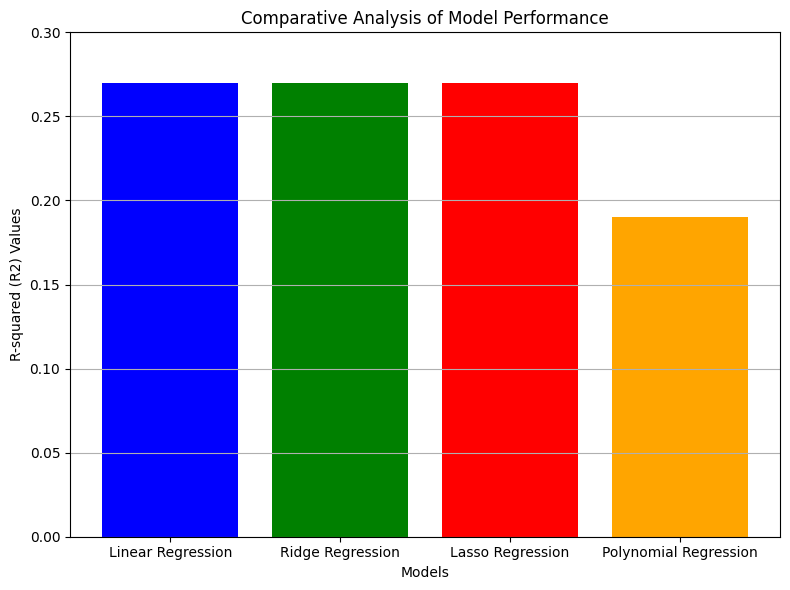

In [51]:
# R-squared values for each model

model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Polynomial Regression']
r_squared_values = [0.27, 0.27, 0.27, 0.19]  # R-squared values obtained from the models

plt.figure(figsize=(8, 6))
plt.bar(model_names, r_squared_values, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Values')
plt.title('Comparative Analysis of Model Performance')
plt.ylim(0, 0.3)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Inference:** Linear, Ridge, and Lasso Regression models seem to have comparable performance based on R-squared values.

Polynomial Regression: Demonstrates a lower R-squared value (19%), indicating comparatively weaker performance in explaining the variance in 'PROT' compared to the other models.